# Exercises 10
To compile and run all the exercises simply type, on this folder `make & ./run.sh`

In [1]:
import numpy as np                                                                 
import matplotlib.pyplot as plt    
%matplotlib inline

## Exercise 10.1


Load all data

In [2]:
squared_cost=np.loadtxt("ex10.1/outputs/squared_lenght.dat") 
circle_cost=np.loadtxt("ex10.1/outputs/circle_lenght.dat") 

x_circle, y_circle=np.loadtxt("ex10.1/outputs/circle_cities_location.dat", delimiter="\t", unpack=True)
final_circle=np.loadtxt("ex10.1/outputs/circle_final_best_path.dat",dtype="uint32")     

x_squared, y_squared=np.loadtxt("ex10.1/outputs/squared_cities_location.dat", delimiter="\t", unpack=True)
final_squared=np.loadtxt("ex10.1/outputs/squared_final_best_path.dat",dtype="uint32")     


Plot all

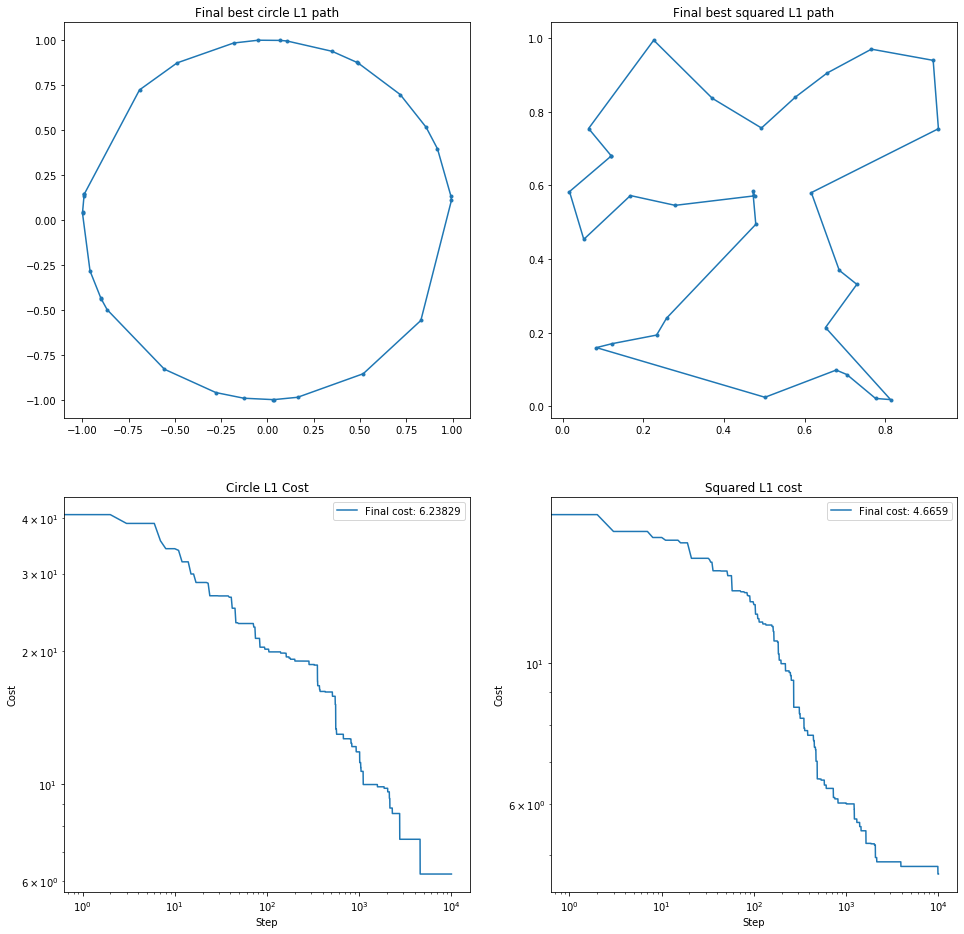

In [3]:
fig,ax = plt.subplots(2, 2, figsize=(16, 16))                                                                                   
         
x_final=x_circle[final_circle]                                                                   
x_final=np.append(x_final, x_circle[final_circle[0]])                                            
y_final=y_circle[final_circle]                                                                   
y_final=np.append(y_final, y_circle[final_circle[0]])                                            
ax[0][0].plot(x_final, y_final, marker=".");                                             
ax[0][0].set_title("Final best circle L1 path");                                                

         
x_final=x_squared[final_squared]                                                                   
x_final=np.append(x_final, x_squared[final_squared[0]])                                            
y_final=y_squared[final_squared]                                                                   
y_final=np.append(y_final, y_squared[final_squared[0]])                                            
ax[0][1].plot(x_final, y_final, marker=".");                                             
ax[0][1].set_title("Final best squared L1 path");                                                
                                               
                        
ax[1][0].set_title("Circle L1 Cost")                                                               
ax[1][0].loglog(circle_cost, label="Final cost: "+str(circle_cost[-1]))
ax[1][0].legend()
ax[1][0].set_xlabel("Step")
ax[1][0].set_ylabel("Cost")

ax[1][1].set_title("Squared L1 cost")     
ax[1][1].set_xlabel("Step")
ax[1][1].set_ylabel("Cost")
ax[1][1].loglog(squared_cost, label="Final cost: "+str(squared_cost[-1]))
ax[1][1].legend();     

## Exercise 10.2
If you had run through the `run.sh`, then a random search with four threads has been done. 
The best result is plotted below.

In [4]:
x_squared, y_squared=np.loadtxt("ex10.2/outputs/squared_cities_location.dat", delimiter="\t", unpack=True)
final_squared=np.loadtxt("ex10.2/outputs/squared_final_best_path.dat",dtype="uint32")     

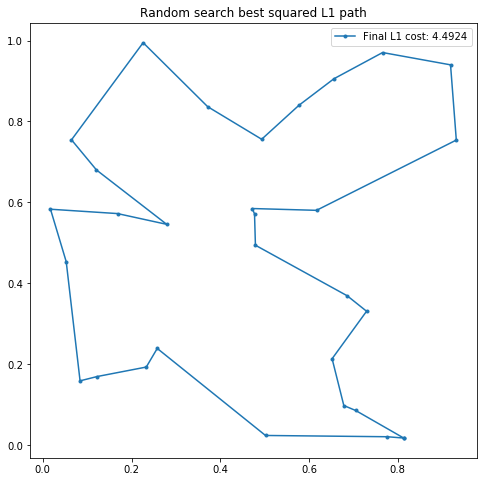

In [5]:
plt.figure(figsize=(8,8))        
x_final=x_squared[final_squared]                                                                   
x_final=np.append(x_final, x_squared[final_squared[0]])                                            
y_final=y_squared[final_squared]                                                                   
y_final=np.append(y_final, y_squared[final_squared[0]])                                            
plt.plot(x_final, y_final, marker=".", label="Final L1 cost: "+str(4.4924));                                             
plt.legend()
plt.title("Random search best squared L1 path");    

The four threads use different seeds for the random generator. To add more diversity in the four threads, I decided to generate the parameters from a normal distribution, giving a different one to each worker. 
In particular $\beta$ and the learning rate are picked at random, where the first one is the weight in $\exp(-\beta E)$, with E being the cost; and the learning rate is the amount of wich $\beta$ is increased at each iteration.
With this method a better path has been found compared to the previous program. With a single worker the best L1 cost is 4.6659, with this method I found 4.4924.